## Kartopu Kayma

> **Problem**: Peter, kurttan kaçmak istiyorsa ondan daha hızlı hareket edebilmelidir. Peter'ın özellikle dengeyi koruyarak kaymayı nasıl öğrenebileceğini Q-Öğrenme kullanarak göreceğiz.

Öncelikle, gym'i yükleyelim ve gerekli kütüphaneleri içe aktaralım:


In [1]:
#code block 1

## Bir cartpole ortamı oluştur


In [ ]:
#code block 2

Çevrenin nasıl çalıştığını görmek için, 100 adımlık kısa bir simülasyon çalıştıralım.


In [ ]:
#code block 3

Simülasyon sırasında, nasıl hareket edeceğimize karar vermek için gözlemler almamız gerekir. Aslında, `step` fonksiyonu bize mevcut gözlemleri, ödül fonksiyonunu ve simülasyona devam etmenin mantıklı olup olmadığını gösteren `done` bayrağını geri döndürür:


In [ ]:
#code block 4

Bu sayıların minimum ve maksimum değerlerini alabiliriz:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Haydi, diğer ayrıklaştırma yöntemini de kutular kullanarak keşfedelim:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Haydi şimdi kısa bir simülasyon çalıştıralım ve bu ayrık ortam değerlerini gözlemleyelim.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Q-Tablo Yapısı


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


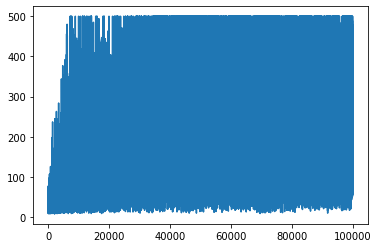

In [20]:
plt.plot(rewards)

Bu grafikten herhangi bir şey söylemek mümkün değildir, çünkü stokastik eğitim sürecinin doğası gereği eğitim oturumlarının uzunluğu büyük ölçüde değişir. Bu grafiği daha anlamlı hale getirmek için, diyelim ki 100 deney serisi üzerinde **hareketli ortalama** hesaplayabiliriz. Bu, `np.convolve` kullanılarak kolayca yapılabilir:


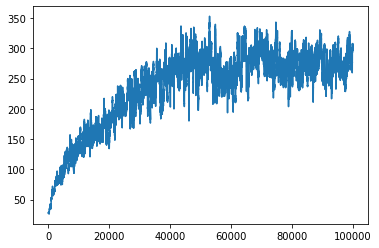

In [22]:
#code block 12

## Hiperparametreleri Değiştirmek ve Sonucu Görmek

Artık eğitilmiş modelin nasıl davrandığını gerçekten görmek ilginç olurdu. Simülasyonu çalıştıralım ve eğitim sırasında kullandığımız aynı eylem seçme stratejisini takip edeceğiz: Q-Tablosundaki olasılık dağılımına göre örnekleme yaparak:


In [23]:
# code block 13

## Sonucu animasyonlu bir GIF olarak kaydetme

Arkadaşlarınızı etkilemek istiyorsanız, denge çubuğunun animasyonlu GIF resmini onlara göndermek isteyebilirsiniz. Bunu yapmak için, bir görüntü karesi oluşturmak üzere `env.render` çağrısını yapabilir ve ardından bunları PIL kütüphanesini kullanarak animasyonlu bir GIF olarak kaydedebilirsiniz:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Feragatname**:  
Bu belge, AI çeviri hizmeti [Co-op Translator](https://github.com/Azure/co-op-translator) kullanılarak çevrilmiştir. Doğruluk için çaba göstersek de, otomatik çevirilerin hata veya yanlışlık içerebileceğini lütfen unutmayın. Belgenin orijinal dili, yetkili kaynak olarak kabul edilmelidir. Kritik bilgiler için profesyonel insan çevirisi önerilir. Bu çevirinin kullanımından kaynaklanan yanlış anlamalar veya yanlış yorumlamalardan sorumlu değiliz.
